In [13]:
# Import das bibliotecas
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops


def statistics(img):
    # Limpar objetos que estejam tocando na borda da imagem
    cleared = clear_border(img)

    # Rotular regiões na imagem
    label_image = label(cleared)

    # Calcular propriedades das regiões rotuladas
    properties = regionprops(label_image)

    # Listas para armazenar as medidas de forma
    areas = []
    perimeters = []
    roundnesses = []
    aspects = []

    # Para cada região, calcular as medidas de forma
    for prop in properties:
        areas.append(prop.area)
        perimeters.append(prop.perimeter)
        if prop.perimeter != 0:
            roundnesses.append((4 * math.pi * prop.area) / prop.perimeter**2)
            #roundnesses.append(4 * prop.area / (math.pi * prop.perimeter**2))
        if prop.minor_axis_length != 0:
            aspects.append(prop.major_axis_length / prop.minor_axis_length)

    # Calcular as médias
    average_area = sum(areas) / len(areas)
    average_perimeter = sum(perimeters) / len(perimeters)
    average_roundness = sum(roundnesses) / len(roundnesses)
    average_aspect = sum(aspects) / len(aspects)

    print('Área Média: ', average_area)
    print('Perímetro Médio: ', average_perimeter)
    print('Redondeza Média: ', average_roundness)
    print('Aspecto Médio: ', average_aspect)

In [14]:
# Dicionário com o path das imagens
images_paths = {
    "normal": "images/Normal.jpg",
    "21h": "images/21h.jpg",
    "29h": "images/29h.jpg",
    "44h": "images/44h.jpg",
    "53h": "images/53h.jpg",
    "73h": "images/73h.jpg",
    "96h": "images/96h.jpg",
}

# Dicionário com todas as imagens BGR do OpenCV
images = {
    key: cv.imread(path) for [key, path] in images_paths.items()
}

Estatísticas Normal: 
Área Média:  868.1705882352941
Perímetro Médio:  117.66123415567715
Redondeza Média:  0.726313169133237
Aspecto Médio:  2.139529889307757

Estatísticas 44h: 
Área Média:  2364.8976377952754
Perímetro Médio:  222.96158770805692
Redondeza Média:  0.718054912704197
Aspecto Médio:  2.2192221878989633

Estatísticas 96h: 
Área Média:  4197.39705882353
Perímetro Médio:  290.82603589176466
Redondeza Média:  0.7093234737401435
Aspecto Médio:  2.2212338468041253


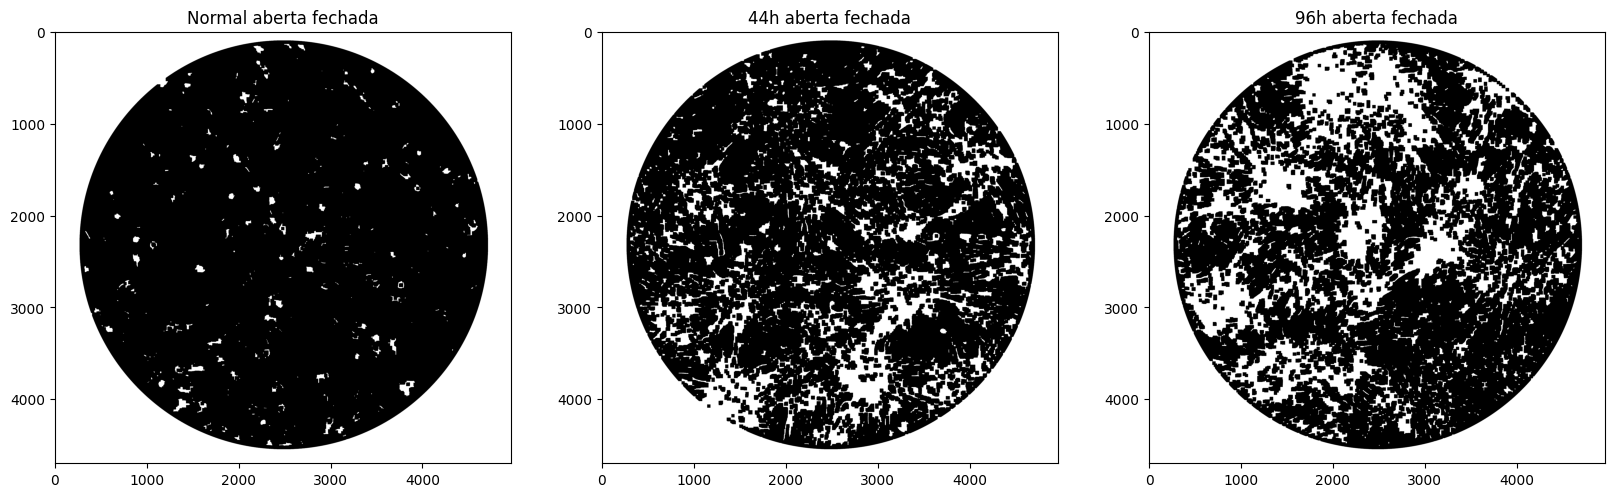

In [15]:
# Conversão das imagens em cores para escala de cinza
normal_gray = cv.cvtColor(images['normal'], cv.COLOR_BGR2GRAY)
_96hours_gray = cv.cvtColor(images['96h'], cv.COLOR_BGR2GRAY)
_44hours_gray = cv.cvtColor(images['44h'], cv.COLOR_BGR2GRAY)


''' 
    Nos três casos, a função está sendo aplicada às imagens, onde o limiar é definido como 225, 180 e 210
    respectivamente, todos os pixels com intensidade acima do limiar serão definidos como 255 (branco), 
    e todos os pixels com intensidade abaixo do limiar serão definidos como 0 (preto). 
    O resultado é armazenado na variável
'''
_, normal_binarized = cv.threshold(normal_gray, 225, 255, cv.THRESH_BINARY)
_, _96hours_binarized = cv.threshold(_96hours_gray, 180, 255, cv.THRESH_BINARY)
_, _44hours_binarized = cv.threshold(_44hours_gray, 210, 255, cv.THRESH_BINARY)

'''
    Ao realizar o limiar, geramos alguns ruídos dentro da placa
    Para remover o ruído, aplicamos a operação de Abertura para remover alguns pontos brancos de dentro da placa
'''
kernel_open = np.ones((5, 5), np.uint8)

normal_binarized_opened = cv.morphologyEx(normal_binarized, cv.MORPH_OPEN, kernel_open)
_96hours_binarized_opened = cv.morphologyEx(_96hours_binarized, cv.MORPH_OPEN, kernel_open)
_44hours_binarized_opened = cv.morphologyEx(_44hours_binarized, cv.MORPH_OPEN, kernel_open)

'''
    Ao realizar a Abertura, realizamos depois a operação de Fechamento
    Para ajudar a preencher melhor os espaços e conectar as regiões
'''
kernel_close = np.ones((35, 35), np.uint8)

normal_binarized_opened_closed = cv.morphologyEx(normal_binarized_opened, cv.MORPH_CLOSE, kernel_close)
_96hours_binarized_opened_closed = cv.morphologyEx(_96hours_binarized_opened, cv.MORPH_CLOSE, kernel_close)
_44hours_binarized_opened_closed = cv.morphologyEx(_44hours_binarized_opened, cv.MORPH_CLOSE, kernel_close)

# Exibir as imagens
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(normal_binarized_opened_closed, cmap='gray')
plt.title('Normal aberta fechada')

plt.subplot(1, 3, 2)
plt.imshow(_44hours_binarized_opened_closed, cmap='gray')
plt.title('44h aberta fechada')

plt.subplot(1, 3, 3)
plt.imshow(_96hours_binarized_opened_closed, cmap='gray')
plt.title('96h aberta fechada')


# Calculando e mostrando alguns dados estatísticos
print('Estatísticas Normal: ')
statistics(normal_binarized_opened_closed)

print('\nEstatísticas 44h: ')
statistics(_44hours_binarized_opened_closed)

print('\nEstatísticas 96h: ')
statistics(_96hours_binarized_opened_closed)


In [16]:
cv.waitKey(0)
cv.destroyAllWindows()